In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

plt.style.use("presentation")

In [3]:
df = pd.read_csv("astrochymist.csv")

First, convert the detection method column into a Python list-type before we can operate on it.

In [4]:
df["Detection Method"] = df["Detection Method"].apply(lambda x: eval(x))

Separate the unique list values to columns in the dataframe, and count them up (basically like a boolean value)

In [5]:
for method in set.union(*df["Detection Method"].apply(set)):
    df[method] = df.apply(lambda f: int(f["Detection Method"].count(method)), axis=1)

Sum up the detections within a year

In [6]:
time_df = df[["Year", "Radio", "UV/Vis", "IR"]].groupby("Year").sum()

Now do the cumulative detections over the years

In [7]:
for column in time_df:
    time_df[column] = np.cumsum(time_df[column])

In [8]:
time_df["Total"] = time_df[["Radio", "UV/Vis", "IR"]].sum(axis=1)

In [9]:
dates = {
    "NRAO 140-foot": 1965,
    "Nobeyama 30-metre": 1982,
    "IRAM 30-metre": 1984,
    "Green Bank Telescope": 2000,
    "SMA": 2003,
    "ALMA": 2013
}

## Fit the rate of molecule discovery from 1970's onwards

In [24]:
timeseries_df = time_df.copy()
timeseries_df.reset_index(inplace=True)

In [31]:
timeseries_df = timeseries_df.loc[timeseries_df["Year"].between(1970., 2030.)]

In [33]:
linear_model = LinearRegression()

In [43]:
linear_model.fit(X=timeseries_df["Year"][:, None], y=timeseries_df["Radio"][:, None])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
linear_model.coef_

array([[3.52009504]])

In [10]:
dates.values()

dict_values([1965, 1982, 1984, 2000, 2003, 2013])

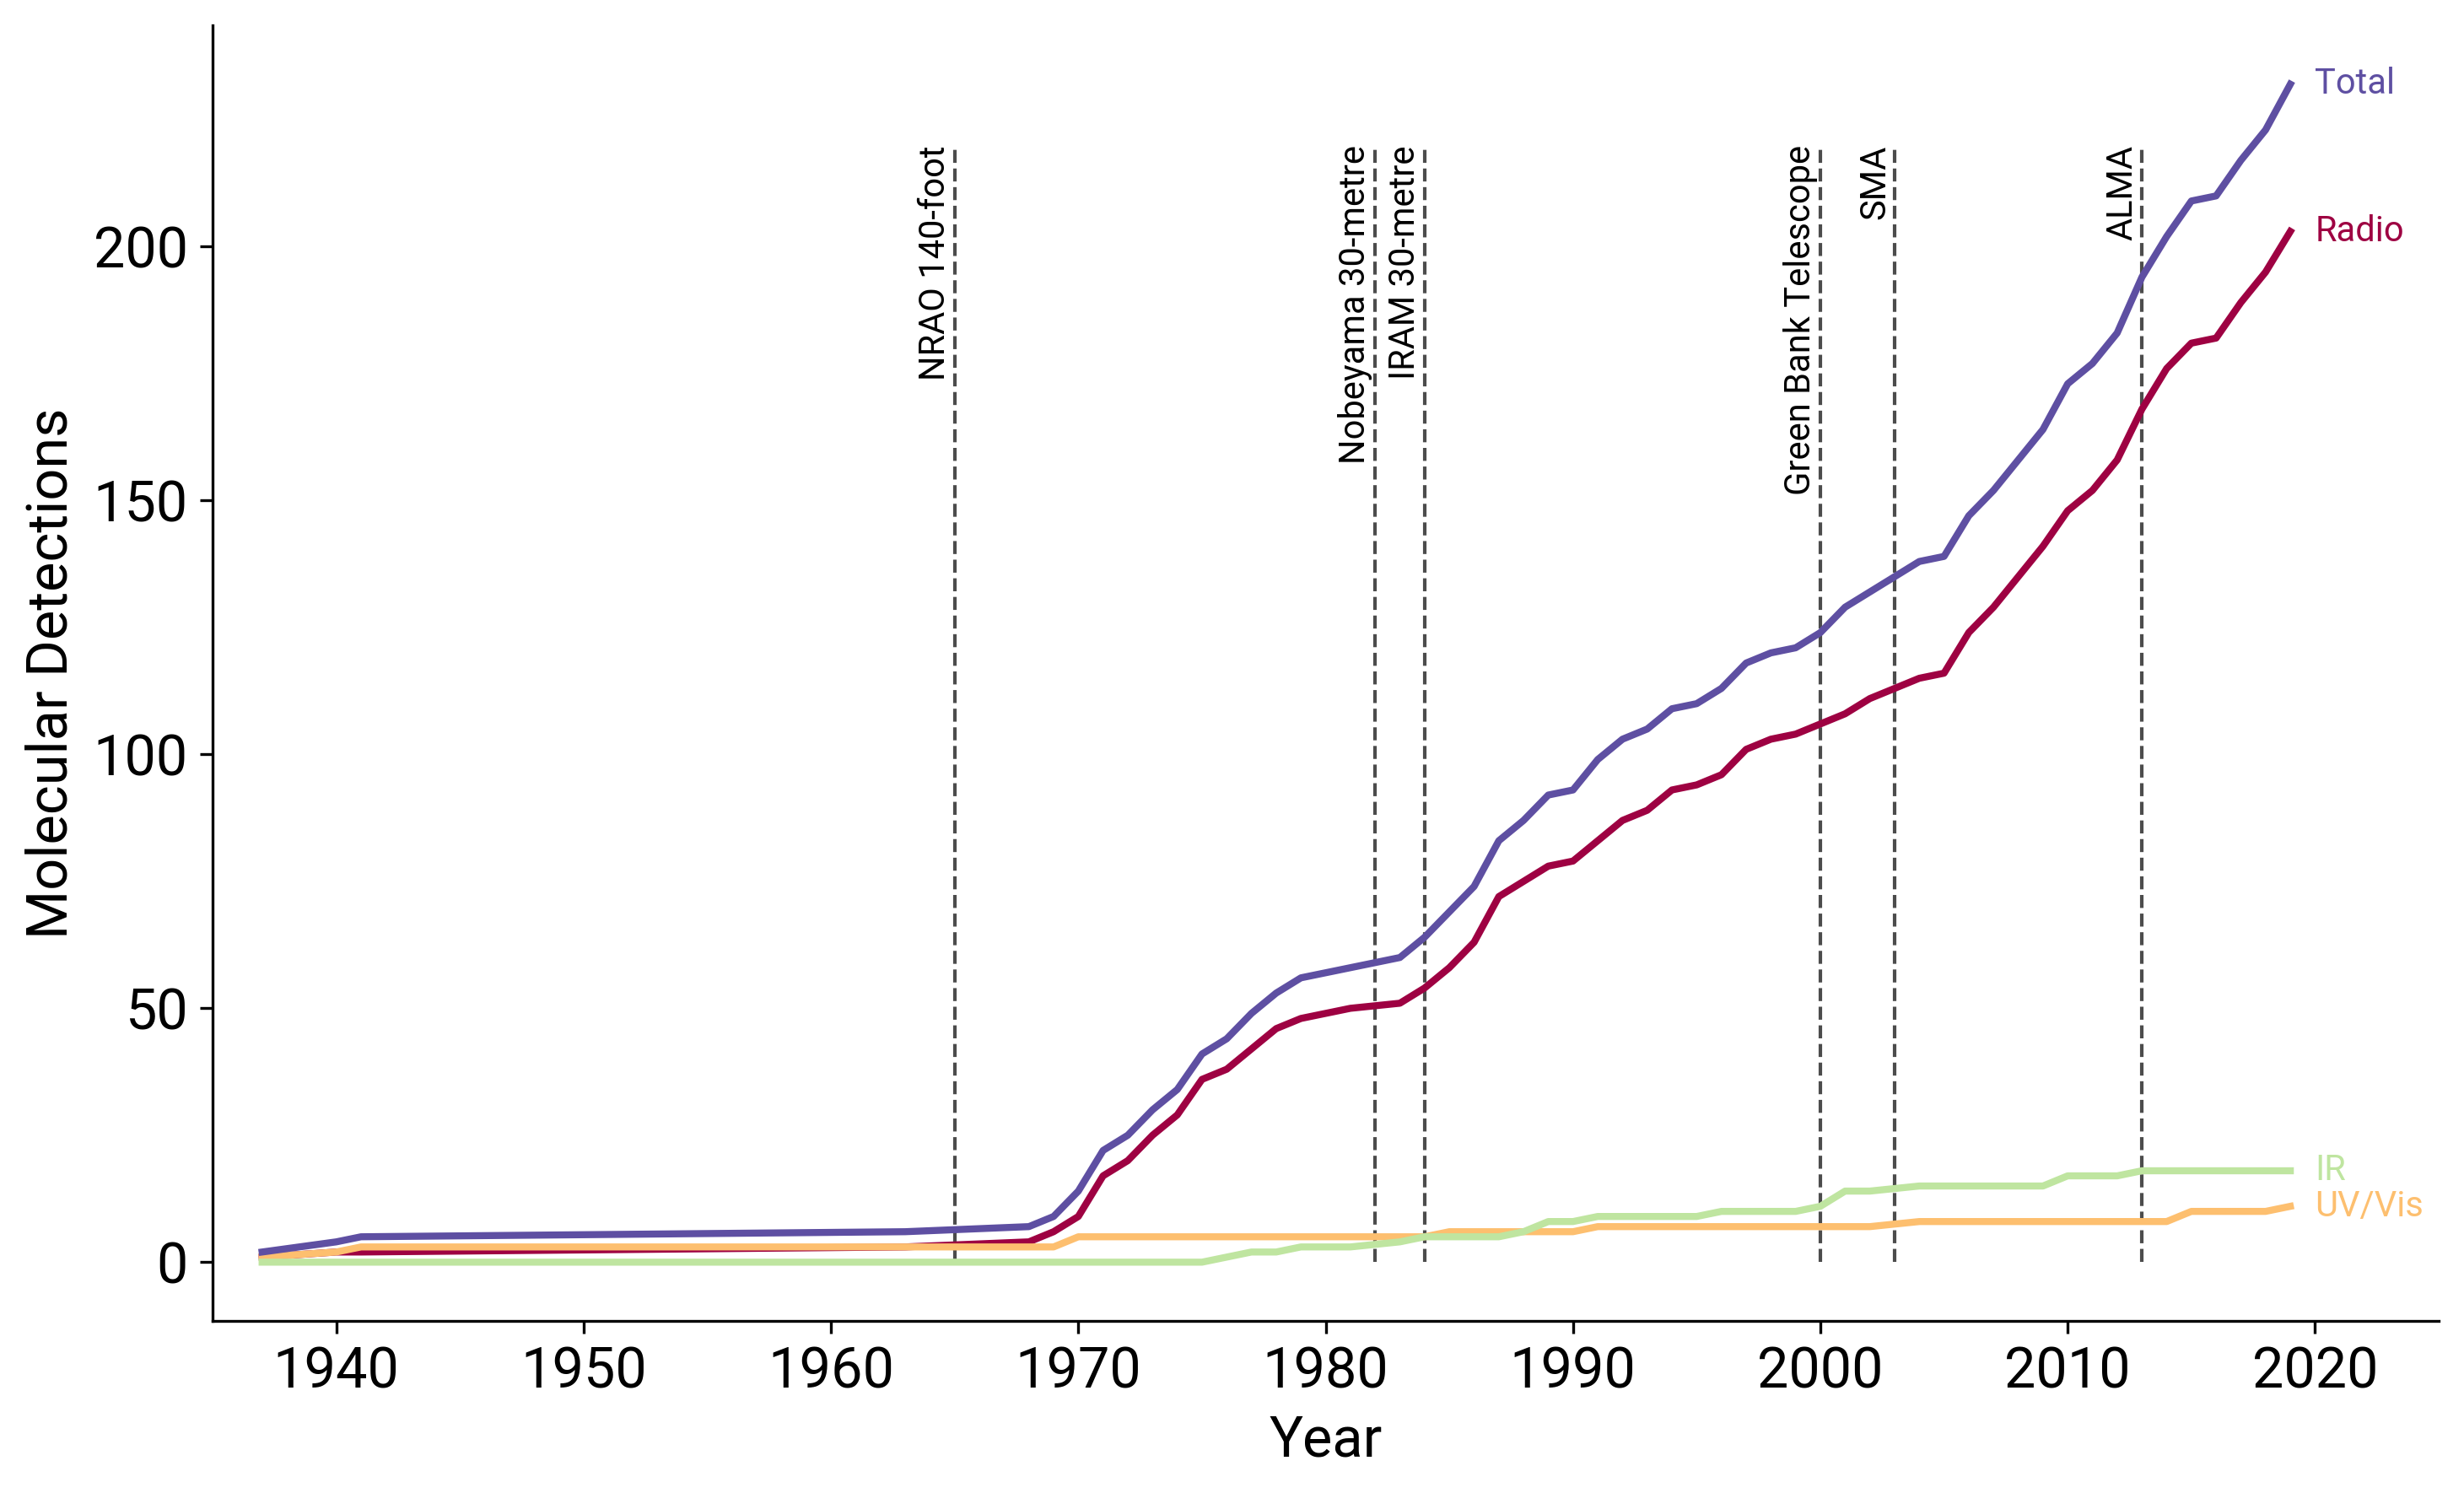

In [18]:
fig, ax = plt.subplots()

colors = plt.cm.Spectral(np.linspace(0., 1., 4))

for column, color in zip(time_df, colors):
    ax.plot(time_df.index, time_df[column], color=color, lw=2.)
    ax.text(
        time_df.index.max() + 1,
        time_df[column].max(),
        column,
        color=color,
        horizontalalignment="left",
        verticalalignment="center"
    )
    
ax.vlines(dates.values(), ymin=0., ymax=220., lw=1, linestyle="--", color="k", alpha=0.7)

for telescope, year in dates.items():
    ax.text(
        year - 1.5,
        220.,
        telescope,
        rotation=90.,
        verticalalignment="top"
    )

ax.set_xlabel("Year")
ax.set_ylabel("Molecular Detections")

fig.tight_layout()
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.set_xlim([1935., 2025.])
fig.savefig("molecular-detections.png", dpi=300, format="png", transparent=True)